### This is an implementation of classification of brain waves using fourier transform method

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from fourier_util import *
%matplotlib inline

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [2]:
SAMPLING_FREQUENCY=200
NUMBER_OF_SAMPLES=15

In [3]:
dataset_1 = pd.read_csv('data/Avijit sir final 10,15,19.csv')
dataset_1.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '11', '12', '13', '14', 'label']
conc_data = dataset_1[dataset_1['label'] == 0].reset_index(drop=True)
exc_data = dataset_1[dataset_1['label'] == 1].reset_index(drop=True)
conc_data.drop(['0','11','12','13','14'], axis=1, inplace=True)
exc_data.drop(['0','11','12','13','14'], axis=1, inplace=True)

### Making data

In [4]:
temp = makedata(conc_data, ns=15, sf=200)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
  after removing the cwd from sys.path.


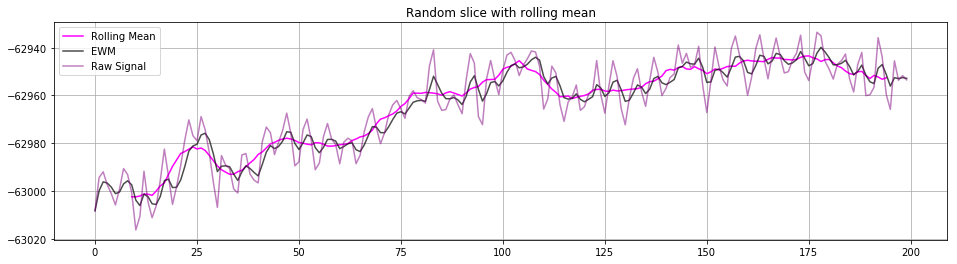

In [5]:
s = pd.Series(temp[0][0])

plt.figure(figsize=(16,4))
plt.plot(pd.rolling_mean(pd.Series(s).shift(-5), 10), c='magenta', label='Rolling Mean')
plt.plot(s.ewm(span=5).mean(), label='EWM', c='k', alpha=0.7)
plt.plot(s, c='purple', alpha=0.5,label='Raw Signal')
plt.grid()
plt.title('Random slice with rolling mean')
plt.legend()

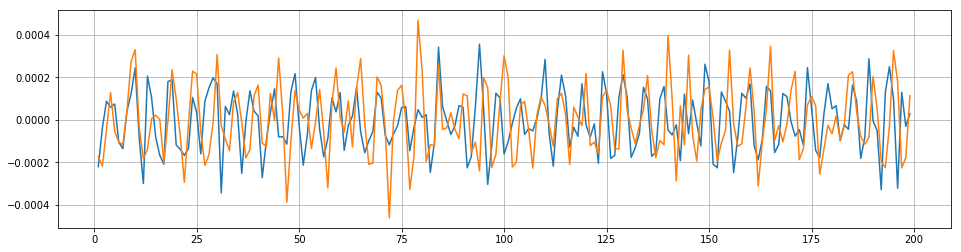

In [23]:
s1 = pd.Series(temp[0][0])
s2 = pd.Series(temp[0][1])
plt.figure(figsize=(16,4))
plt.grid()
plt.plot(s1[:].pct_change())
plt.plot(s2[:].pct_change())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=50).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


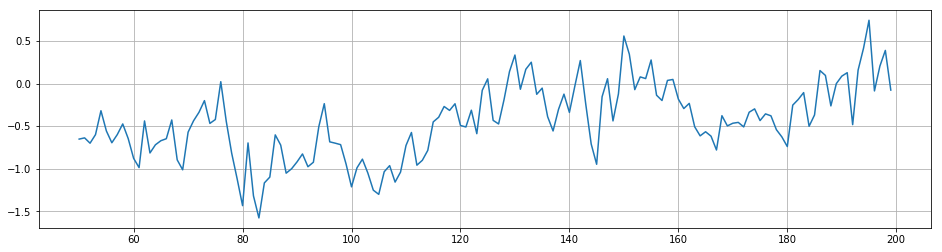

In [33]:
plt.figure(figsize=(16,4))
plt.grid()
plt.plot(pd.rolling_mean(pd.Series(s), 50).pct_change()*100000)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=4).mean()
  


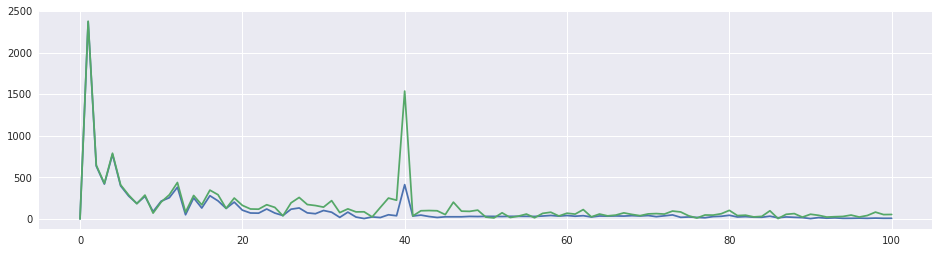

In [415]:
temp_data = dataset_1['2'][:200]
x = pd.rolling_mean(temp_data, 4)[:]
x.values[:3] = x.mean()
plt.figure(figsize=(16,4))
plt.plot(FFT(x))
plt.plot(FFT(temp_data))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=4).mean()
  


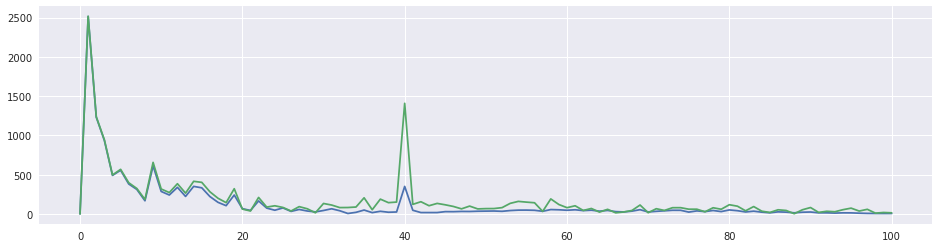

In [432]:
temp_data = dataset_1['2'][8600:8800]
x = pd.rolling_mean(temp_data, 4)[:]
x.values[:3] = x.mean()
plt.figure(figsize=(16,4))
plt.plot(FFT(x))
plt.plot(FFT(temp_data))

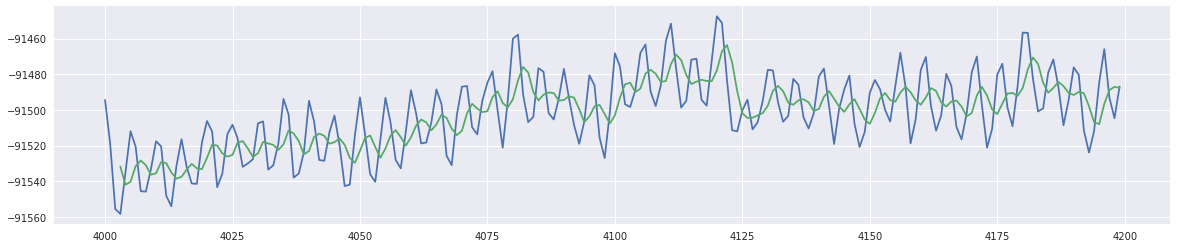

In [479]:
plt.figure(figsize=(20,4))
plt.plot(dataset_1['4'].iloc[:-1][4000:4200])
plt.plot(dataset_1['4'][4000:4200].rolling(window=4).mean())

In [161]:
conc_data = makedata(conc_data, ns=15, sf=200) [0]
exc_data = makedata(exc_data, ns=15, sf=200) [0]

In [162]:
train_conc = pd.DataFrame(conc_data)
temp1 = []
for i in range(len(train_conc)):
    seq = train_conc.iloc[i]
    temp1.append(pd.Series(FFT(seq)))

temp1 = pd.DataFrame(temp1)
temp1['label'] = 0

In [163]:
train_conc = pd.DataFrame(exc_data)
temp2 = []
for i in range(len(train_conc)):
    seq = train_conc.iloc[i]
    temp2.append(pd.Series(FFT(seq)))

temp2 = pd.DataFrame(temp2)
temp2['label'] = 1

In [164]:
data = pd.concat([temp1, temp2]).reset_index(drop=True)

### Feature Scaling

In [167]:
def norm(df):
    _max_, _min_ = np.array(df).max(), np.array(df).min()
    
    return df.apply(lambda x: (x - _min_)/(_max_ - _min_))
    

In [238]:
scaled = data.apply(lambda x: x/x.max(), axis=1)
scaled['label'] = np.append(np.zeros(15),np.ones(15))
scld[0] = 0

In [239]:
X = scaled.drop('label', axis=1)
y = scaled['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

### Fitting Model

In [248]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=101))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [249]:
model.fit(X_train,y_train, epochs=30)

Epoch 1/30
18/18 [==============================] - 0s 19ms/step - loss: 0.6858 - acc: 0.5000
Epoch 2/30
18/18 [==============================] - 0s 105us/step - loss: 0.6824 - acc: 0.5000
Epoch 3/30
18/18 [==============================] - 0s 174us/step - loss: 0.6790 - acc: 0.5000
Epoch 4/30
18/18 [==============================] - 0s 136us/step - loss: 0.6757 - acc: 0.5000
Epoch 5/30
18/18 [==============================] - 0s 122us/step - loss: 0.6724 - acc: 0.5000
Epoch 6/30
18/18 [==============================] - 0s 352us/step - loss: 0.6693 - acc: 0.5000
Epoch 7/30
18/18 [==============================] - 0s 146us/step - loss: 0.6663 - acc: 0.5000
Epoch 8/30
18/18 [==============================] - 0s 146us/step - loss: 0.6633 - acc: 0.4444
Epoch 9/30
18/18 [==============================] - 0s 110us/step - loss: 0.6606 - acc: 0.5000
Epoch 10/30
18/18 [==============================] - 0s 99us/step - loss: 0.6580 - acc: 0.5000
Epoch 11/30
18/18 [==============================] 

In [250]:
pred = model.predict_classes(X_test)

In [252]:
confusion_matrix(y_test, pred)

array([[4, 2],
       [5, 1]])

In [258]:
pred.T[0]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int32)